In [1]:
%matplotlib inline
import talib as ta
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [171]:
class TALibVolatilityStudies:
    
    def ATR(self, high, low, close, period, feature_dict):
        feature_dict['ATR_'+str(period)]='Keep'
        averageTR = ta.ATR(
            high,
            low,
            close,
            #defualt is 14
            period)
        return averageTR, feature_dict
 
    def NATR(self, high, low, close, period, feature_dict):
        feature_dict['NormalizedATR_'+str(period)]='Keep'
        normalizedATR = ta.NATR(
            high,
            low,
            close,
            #defualt is 14
            period)
        return normalizedATR, feature_dict
    
    def ATR_Ratio(self, high, low, close, shortperiod, longperiod, feature_dict):
        feature_dict['ATRratio_S'+str(shortperiod)+"_L"+str(longperiod)]='Keep'
        shortATR =  ta.ATR(
            high,
            low,
            close,
            #defualt is 14
            shortperiod) 
        longATR =  ta.ATR(
            high,
            low,
            close,
            #defualt is 14
            longperiod)
        atr_Ratio = shortATR / longATR
        return atr_Ratio, feature_dict
    
    def Delta_ATR_Ratio(self, high, low, close, shortperiod, longperiod, delta, feature_dict):
        temp_dict={}
        feature_dict['DeltaATRratio_S'+str(shortperiod)+'_L'+str(longperiod)+'_D'+str(delta)]='Keep'
        current_ATR_Ratio, temp_dict = self.ATR_Ratio(high, low, close, shortperiod, longperiod, temp_dict)
        nrows = current_ATR_Ratio.shape[0]
        delta_ATR_Ratio = np.zeros(nrows)
        for i in range (delta,nrows):
            delta_ATR_Ratio[i] = current_ATR_Ratio[i] - current_ATR_Ratio[i-1] 
        return delta_ATR_Ratio, feature_dict
    
    def BBWidth(self, close, period, feature_dict):
        feature_dict['BollBandWidth_'+str(period)] = 'Keep'
        taLibOS = TALibOverlapStudies()
        upperBand, middleBand, lowerBand, feature_dict = taLibOS.BollBands(
            close, period, 2, feature_dict)
        bollBandWidth = ((upperBand - lowerBand) / middleBand ) * 100
        return bollBandWidth, feature_dict
    
    def AbsPriceChgOsc(self, high, low, close, short_period, short_period_mult, feature_dict):
        temp_dict = {}
        feature_dict['AbsPriceChangeRatio_S'+str(short_period)+'_MULT'+str(short_period_mult)] = 'Keep'
        df = pd.DataFrame()
        df['log_return'] = np.diff(np.log(close))
        #print(df.log_return.head(30))
        long_period = short_period * short_period_mult    
        ATR_temp = ta.ATR(
            high, 
            low, 
            close, 
            long_period)
        #print(ATR_temp.head(40))
        df['tempAbsPriceChgOsc'] = (df['log_return'].rolling(window=long_period, center=False).mean() -
                                    df['log_return'].rolling(window=short_period, center=False).mean())/ATR_temp
        print(df.tempAbsPriceChgOsc.head(40))
        df['tempAbsPriceChgOsc'].fillna(0, inplace=True)
        
        scaler = MinMaxScaler(feature_range=(-50,50))
        df['AbsPriceChgOsc'] = scaler.fit_transform(df[['tempAbsPriceChgOsc']])
        return df.AbsPriceChgOsc, feature_dict

In [172]:
import sys
sys.path.append('./lib')
sys.path.append('./utilities')
from plot_utils import *
from retrieve_data import *
from ta_overlap_studies import *
dataLoadStartDate = "2014-04-01"
dataLoadEndDate = "2018-04-01"
issue = "ABBV"
feature_dict = {}

taLibVoltltySt = TALibVolatilityStudies()
    
dSet = DataRetrieve()
dataSet = dSet.read_issue_data(issue)
    
dataSet = dSet.set_date_range(dataSet, dataLoadStartDate,dataLoadEndDate)

Successfully retrieved data series for ABBV


In [173]:
taLibOS = TALibOverlapStudies()

short_period = 10
short_period_mult = 2

In [174]:
dataSet["AbsPriceChgOsc"], feature_dict = taLibVoltltySt.AbsPriceChgOsc(
    dataSet.High, 
    dataSet.Low, 
    dataSet.Pri,
    short_period,
    short_period_mult,
    feature_dict)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
37   NaN
38   NaN
39   NaN
Name: tempAbsPriceChgOsc, dtype: float64


In [170]:
print(dataSet["AbsPriceChgOsc"])

2014-04-01   NaN
2014-04-02   NaN
2014-04-03   NaN
2014-04-04   NaN
2014-04-07   NaN
2014-04-08   NaN
2014-04-09   NaN
2014-04-10   NaN
2014-04-11   NaN
2014-04-14   NaN
2014-04-15   NaN
2014-04-16   NaN
2014-04-17   NaN
2014-04-18   NaN
2014-04-21   NaN
2014-04-22   NaN
2014-04-23   NaN
2014-04-24   NaN
2014-04-25   NaN
2014-04-28   NaN
2014-04-29   NaN
2014-04-30   NaN
2014-05-01   NaN
2014-05-02   NaN
2014-05-05   NaN
2014-05-06   NaN
2014-05-07   NaN
2014-05-08   NaN
2014-05-09   NaN
2014-05-12   NaN
              ..
2018-02-16   NaN
2018-02-20   NaN
2018-02-21   NaN
2018-02-22   NaN
2018-02-23   NaN
2018-02-26   NaN
2018-02-27   NaN
2018-02-28   NaN
2018-03-01   NaN
2018-03-02   NaN
2018-03-05   NaN
2018-03-06   NaN
2018-03-07   NaN
2018-03-08   NaN
2018-03-09   NaN
2018-03-12   NaN
2018-03-13   NaN
2018-03-14   NaN
2018-03-15   NaN
2018-03-16   NaN
2018-03-19   NaN
2018-03-20   NaN
2018-03-21   NaN
2018-03-22   NaN
2018-03-23   NaN
2018-03-26   NaN
2018-03-27   NaN
2018-03-28   N

In [110]:
dataSet['ATR_20'], feature_dict = taLibVoltltySt.ATR(
    dataSet.High.values, 
    dataSet.Low.values, 
    dataSet.Pri.values, 
    20,
    feature_dict)

dataSet['NormATR_14'], feature_dict = taLibVoltltySt.NATR(
    dataSet.High.values, 
    dataSet.Low.values, 
    dataSet.Pri.values, 
    14, 
    feature_dict)

dataSet['ATRRatio_S10_L20'], feature_dict = taLibVoltltySt.ATR_Ratio(
    dataSet.High.values, 
    dataSet.Low.values, 
    dataSet.Pri.values, 
    10,
    20,
    feature_dict)

dataSet['DeltaATRRatio_S10_L20_D5'], feature_dict = taLibVoltltySt.Delta_ATR_Ratio(
    dataSet.High.values, 
    dataSet.Low.values, 
    dataSet.Pri.values, 
    10,
    20,
    5,
    feature_dict)

dataSet['BBWidth_20'], feature_dict = taLibVoltltySt.BBWidth(
    dataSet.Pri.values, 
    20, 
    feature_dict)

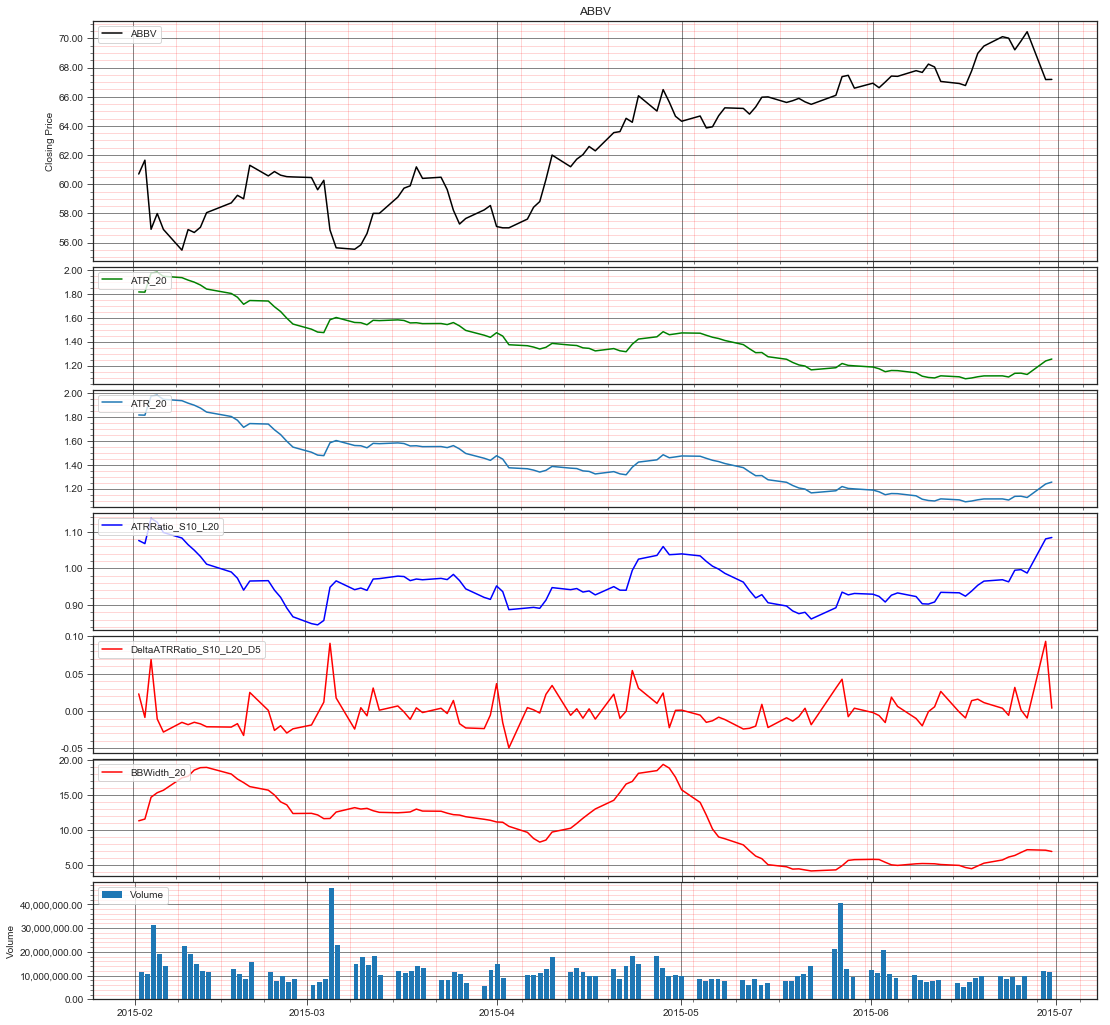

In [113]:
startDate = "2015-02-01"
endDate = "2015-06-30"
rsiDataSet = dataSet.ix[startDate:endDate]
plt.figure(figsize=(18,18))
horizplots = 8
top = plt.subplot2grid((horizplots,4), (0, 0), rowspan=2, colspan=4)
middle = plt.subplot2grid((horizplots,4), (2, 0), rowspan=1, colspan=4)
middle2 = plt.subplot2grid((horizplots,4), (3, 0), rowspan=1, colspan=4)
middle3 = plt.subplot2grid((horizplots,4), (4, 0), rowspan=1, colspan=4)
middle4 = plt.subplot2grid((horizplots,4), (5, 0), rowspan=1, colspan=4)
middle5 = plt.subplot2grid((horizplots,4), (6, 0), rowspan=1, colspan=4)
bottom = plt.subplot2grid((horizplots,4), (7, 0), rowspan=1, colspan=4)

top.plot(rsiDataSet.index, rsiDataSet['Pri'], 'k-', markersize=3,label=issue)
middle.plot(rsiDataSet.index, rsiDataSet['ATR_20'], 'g-')
middle2.plot(rsiDataSet.index, rsiDataSet['ATR_20'], '-')
middle3.plot(rsiDataSet.index, rsiDataSet['ATRRatio_S10_L20'], 'b-')
middle4.plot(rsiDataSet.index, rsiDataSet['DeltaATRRatio_S10_L20_D5'], 'r-')
middle5.plot(rsiDataSet.index, rsiDataSet['BBWidth_20'], 'r-')
bottom.bar(rsiDataSet.index, rsiDataSet['Volume'], label='Volume')

plt.subplots_adjust(hspace=0.05)
# set the labels
top.axes.get_xaxis().set_visible(True)
top.set_title(str(issue))
top.set_ylabel('Closing Price')
bottom.set_ylabel('Volume')

for ax in top, middle, middle2, middle3, middle4, middle5, bottom:
                ax.label_outer()
                ax.legend(loc='upper left', frameon=True, fontsize=10)
                ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.02f}'))
                ax.grid(True, which='both')
                ax.xaxis_date()
                ax.autoscale_view()
                ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.6)
                ax.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
                ax.minorticks_on()